# Analysing Data on Netflix Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Style

In [2]:
data = pd.read_csv('C:/Users/shaik/Desktop/python jupyter notebook/netflix_titles.csv')


In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
#this command shows the number of rows and columns present in a dataset
data.shape

(8807, 12)

In [7]:
#this command shows the number of null of valuse in each column has
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# total number count of movies in dataset
movie_count = data[data['type']=='Movie'].shape[0]
movie_count

6131

In [9]:
# total number count of TV Shows in dataset
TV_Show_count = data[data['type']=='TV Show'].shape[0]
TV_Show_count

2676

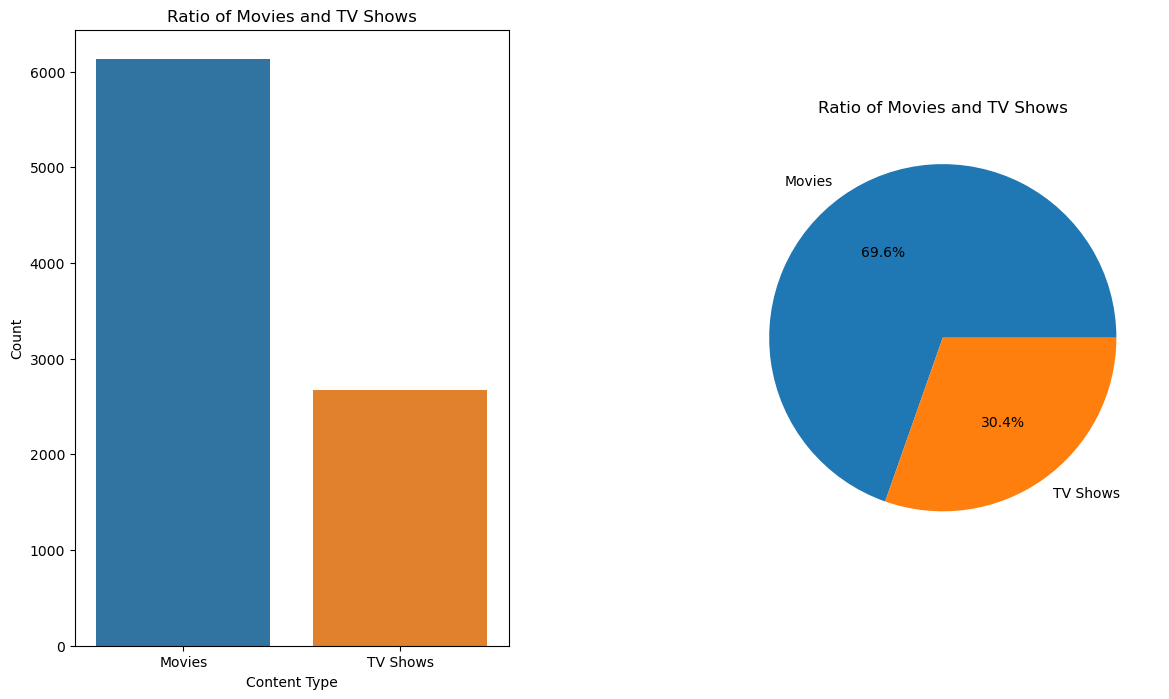

In [10]:
# Create a new DataFrame with the counts
counts_data = pd.DataFrame({'Content Type': ['Movies', 'TV Shows'],
                           'Count': [movie_count, TV_Show_count]})

# Create a figure with two subplots
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(14, 8))

# Plot the bar chart
sns.barplot(x='Content Type', y='Count', data=counts_data, ax=axes1)
axes1.set_xlabel('Content Type')
axes1.set_ylabel('Count')
axes1.set_title('Ratio of Movies and TV Shows')

# Plot the pie chart
counts = [movie_count, TV_Show_count]
labels = ['Movies', 'TV Shows']
axes2.pie(counts, labels=labels, autopct='%1.1f%%')
axes2.set_title('Ratio of Movies and TV Shows')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)


In [11]:
# Filter the data for movies
movies_data = data[data['type'] == 'Movie']

# Drop rows with missing values in the 'rating' column
movies_data = movies_data.dropna(subset=['rating'])

# Sort movies_data by rating in descending order
sorted_movies = movies_data.sort_values('rating', ascending=False)

# Get the movie with the highest rating
highest_rated_movie = sorted_movies.iloc[0]

# Get the movie with the lowest rating
lowest_rated_movie = sorted_movies.iloc[-1]



In [12]:
# movie with highest rating
print('Highest Rating movie title and Rating : ')
print( 'Title: ' + highest_rated_movie.title)
print()
print('Rating : ' + highest_rated_movie.rating)

Highest Rating movie title and Rating : 
Title: You Don't Mess with the Zohan

Rating : UR


In [13]:
# movie with lowest rating rating
print('Highest Rating movie title and Rating : ')
print( 'Title: ' + lowest_rated_movie.title)
print()
print('Rating : ' + lowest_rated_movie.rating)

Highest Rating movie title and Rating : 
Title: Louis C.K.: Live at the Comedy Store

Rating : 66 min


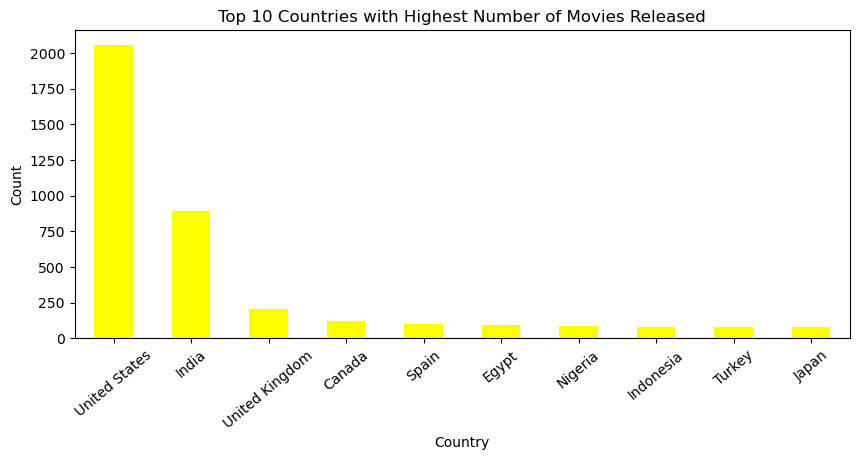

In [14]:
# Filter the data for movies
movies_data = data[data['type'] == 'Movie']

# Group the data by country and count the number of movies in each country
movies_by_country = movies_data['country'].value_counts()

# Get the top 10 countries with the highest number of movies released
top_10_countries_highest = movies_by_country.head(10)

# Bar plot for the top 10 countries with the highest number of movies released
top_10_countries_highest.plot.bar(color='yellow', figsize=(10, 4) )
plt.title('Top 10 Countries with Highest Number of Movies Released')
plt.xlabel('Country')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=40)
plt.show()


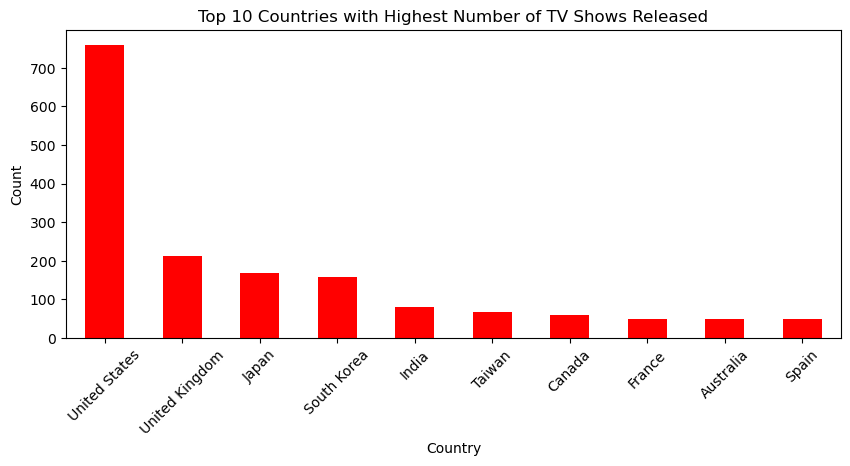

In [15]:
# Filter the data for TV shows
tv_shows_data = data[data['type'] == 'TV Show']

# Group the data by country and count the number of TV shows in each country
tv_shows_by_country = tv_shows_data['country'].value_counts()

# Get the top 10 countries with the highest number of TV shows released
top_10_countries_highest = tv_shows_by_country.head(10)

# Bar plot for the top 10 countries with the highest number of TV shows released
top_10_countries_highest.plot.bar(color='red',figsize=(10, 4))
plt.title('Top 10 Countries with Highest Number of TV Shows Released')
plt.xlabel('Country')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

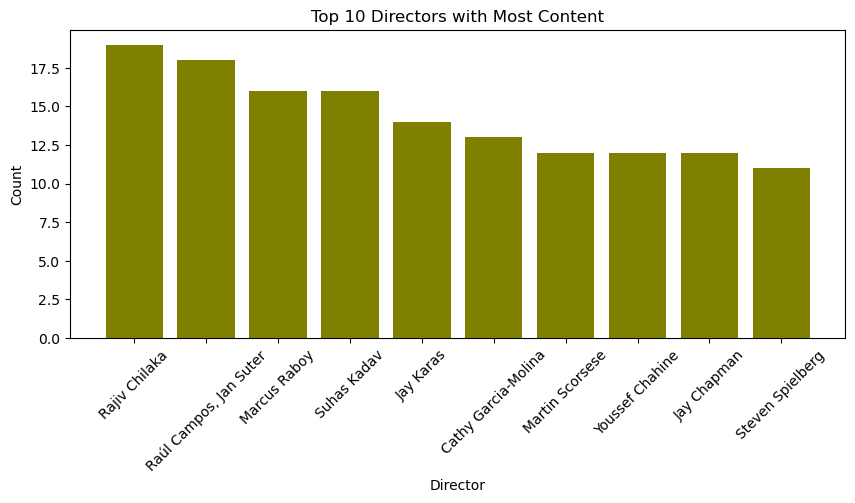

In [16]:
# Analysis of Top 10 Directors 

top_directors = data['director'].value_counts().head(10)
plt.figure(figsize=(10, 4))
plt.bar(top_directors.index, top_directors.values, color='olive')
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors with Most Content')
plt.xticks(rotation=45)
plt.show()

C:\Users\shaik\AppData\Local\Temp\ipykernel_20488\1706880029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(float)


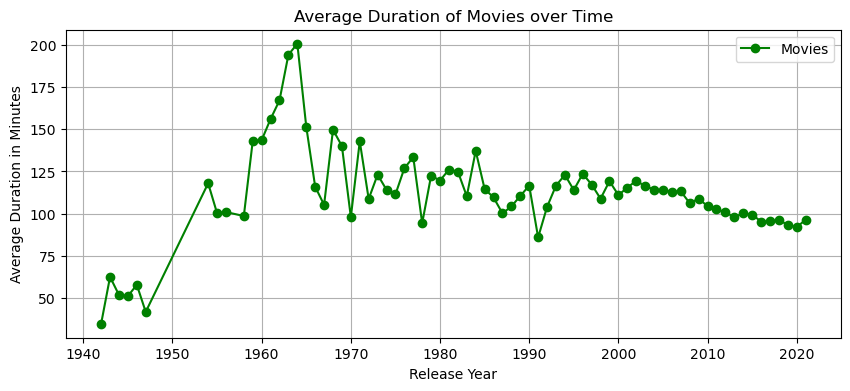

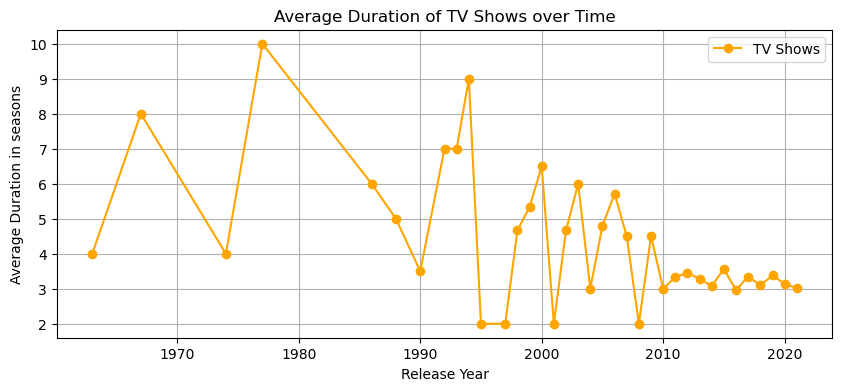

In [17]:
# Filter out rows with 'Movie' or 'TV Show' type
movies_data = data[data['type'] == 'Movie']
tv_shows_data = data[data['type'] == 'TV Show']

# Convert 'duration' column to numeric for movies
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(float)

# Remove rows with '1 Season' duration for TV shows
tv_shows_data = tv_shows_data[~tv_shows_data['duration'].str.contains('1 Season')]

# Convert 'duration' column to numeric for TV shows
tv_shows_data['duration'] = tv_shows_data['duration'].str.replace(' Seasons', '').astype(int)

# Group data by 'release_year' and calculate average duration
avg_movies_duration = movies_data.groupby('release_year')['duration'].mean().reset_index()
avg_tv_shows_duration = tv_shows_data.groupby('release_year')['duration'].mean().reset_index()

# Plot average duration over time for movies
plt.figure(figsize=(10, 4))
plt.plot(avg_movies_duration['release_year'], avg_movies_duration['duration'], marker='o', linestyle='-', color='green', label='Movies')

plt.xlabel('Release Year')
plt.ylabel('Average Duration in Minutes')
plt.title('Average Duration of Movies over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot average duration over time for TV shows
plt.figure(figsize=(10, 4))
plt.plot(avg_tv_shows_duration['release_year'], avg_tv_shows_duration['duration'], marker='o', linestyle='-', color='orange', label='TV Shows')

plt.xlabel('Release Year')
plt.ylabel('Average Duration in seasons')
plt.title('Average Duration of TV Shows over Time')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Filter the data for movies
movies_data = data[data['type'] == 'Movie']

movies_data = movies_data.dropna(subset=['rating', 'country'])

sorted_movies = movies_data.sort_values('rating', ascending=False)

# Get the top 10 movies with the Highest rating
top_5_highest_rated_movies = sorted_movies.head(5)

# Get the top 10 movies with the lowest rating
top_5_lowest_rated_movies = sorted_movies.tail(5)

# top 10 highest rated movies
print(Fore.BLUE + "Top 5 Movies with the Highest Rating:")
for index, movie in top_5_highest_rated_movies.iterrows():
    print(Fore.RED + "\nTitle:", movie['title'])
    print(Fore.RED + "Rating:", movie['rating'])
    print(Fore.RED + "Country:", movie['country'])
    print("------------------------")
print(Style.RESET_ALL)

# top 5 lowest rated movies
print(Fore.BLUE + "Top 5 Movies with the Lowest Rating:")
for index, movie in top_5_lowest_rated_movies.iterrows():
    print(Fore.RED + "\nTitle:", movie['title'])
    print(Fore.RED + "Rating:", movie['rating'])
    print(Fore.RED + "Country:", movie['country'])
    print("------------------------")
print(Style.RESET_ALL)


Top 5 Movies with the Highest Rating:

Title: Immoral Tales
Rating: UR
Country: France
------------------------

Title: Sex Doll
Rating: UR
Country: United Kingdom, France
------------------------

Title: You Don't Mess with the Zohan
Rating: UR
Country: United States
------------------------

Title: LEGO Ninjago: Masters of Spinjitzu: Day of the Departed
Rating: TV-Y7-FV
Country: Denmark, China
------------------------

Title: Dear Dracula
Rating: TV-Y7-FV
Country: United States
------------------------

Top 5 Movies with the Lowest Rating:

Title: Chicken Little
Rating: G
Country: United States
------------------------

Title: A Shaun the Sheep Movie: Farmageddon
Rating: G
Country: United Kingdom, France, Belgium, Ireland, United States
------------------------

Title: Louis C.K.: Hilarious
Rating: 84 min
Country: United States
------------------------

Title: Louis C.K. 2017
Rating: 74 min
Country: United States
------------------------

Title: Louis C.K.: Live at the Comedy Store
R

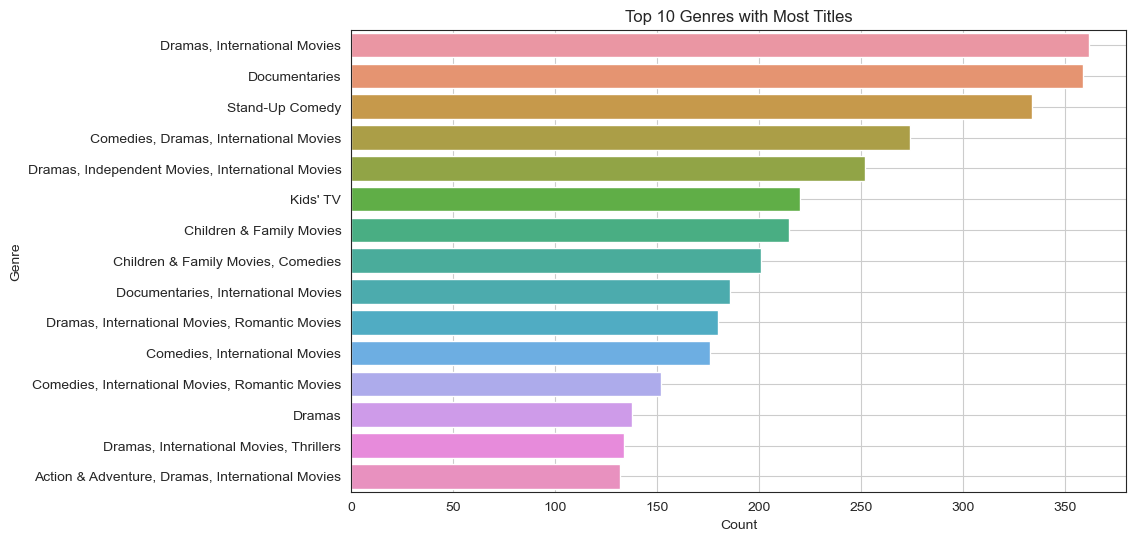

In [19]:
# Set the style
sns.set_style('white')

plt.figure(figsize=(10, 6))
sns.countplot(y='listed_in', data=data, order=data['listed_in'].value_counts().index[:15])
plt.title('Top 10 Genres with Most Titles')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

# Thanks For Reviewing my project


# I am Wasay Shaikh

# your feedback means alot to me 

#                                                  The END